# Setup extra path

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [2]:
import polars as pl

from playground.eda.visualization import plot_columns_and_target_factors

# Load data

In [3]:
df = pl.read_csv(Path.cwd() / "old.csv")
df

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
i64,str,str,i64,str,i64,i64,str,i64,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
41,"""Yes""","""Travel_Rarely""",1102,"""Sales""",1,2,"""Life Sciences""",1,1,2,"""Female""",94,3,2,"""Sales Executiv...",4,"""Single""",5993,19479,8,"""Y""","""Yes""",11,3,1,80,0,8,0,1,6,4,0,5
49,"""No""","""Travel_Frequen...",279,"""Research & Dev...",8,1,"""Life Sciences""",1,2,3,"""Male""",61,2,2,"""Research Scien...",2,"""Married""",5130,24907,1,"""Y""","""No""",23,4,4,80,1,10,3,3,10,7,1,7
37,"""Yes""","""Travel_Rarely""",1373,"""Research & Dev...",2,2,"""Other""",1,4,4,"""Male""",92,2,1,"""Laboratory Tec...",3,"""Single""",2090,2396,6,"""Y""","""Yes""",15,3,2,80,0,7,3,3,0,0,0,0
33,"""No""","""Travel_Frequen...",1392,"""Research & Dev...",3,4,"""Life Sciences""",1,5,4,"""Female""",56,3,1,"""Research Scien...",3,"""Married""",2909,23159,1,"""Y""","""Yes""",11,3,3,80,0,8,3,3,8,7,3,0
27,"""No""","""Travel_Rarely""",591,"""Research & Dev...",2,1,"""Medical""",1,7,1,"""Male""",40,3,1,"""Laboratory Tec...",2,"""Married""",3468,16632,9,"""Y""","""No""",12,3,4,80,1,6,3,3,2,2,2,2
32,"""No""","""Travel_Frequen...",1005,"""Research & Dev...",2,2,"""Life Sciences""",1,8,4,"""Male""",79,3,1,"""Laboratory Tec...",4,"""Single""",3068,11864,0,"""Y""","""No""",13,3,3,80,0,8,2,2,7,7,3,6
59,"""No""","""Travel_Rarely""",1324,"""Research & Dev...",3,3,"""Medical""",1,10,3,"""Female""",81,4,1,"""Laboratory Tec...",1,"""Married""",2670,9964,4,"""Y""","""Yes""",20,4,1,80,3,12,3,2,1,0,0,0
30,"""No""","""Travel_Rarely""",1358,"""Research & Dev...",24,1,"""Life Sciences""",1,11,4,"""Male""",67,3,1,"""Laboratory Tec...",3,"""Divorced""",2693,13335,1,"""Y""","""No""",22,4,2,80,1,1,2,3,1,0,0,0
38,"""No""","""Travel_Frequen...",216,"""Research & Dev...",23,3,"""Life Sciences""",1,12,4,"""Male""",44,2,3,"""Manufacturing ...",3,"""Single""",9526,8787,0,"""Y""","""No""",21,4,2,80,0,10,2,3,9,7,1,8


# Check for missing values

In [4]:
df.null_count()

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Visualize features and their relationship with the target

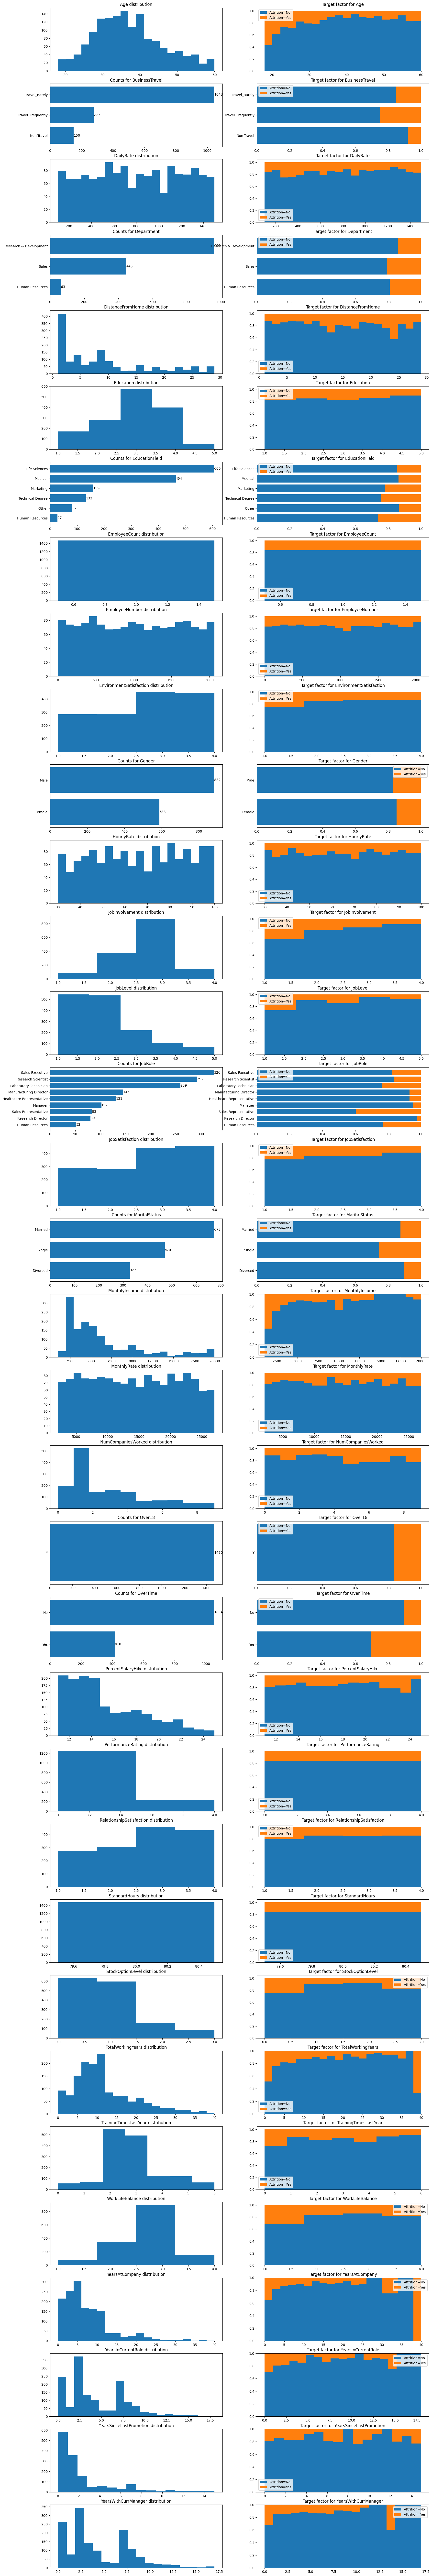

In [5]:
plot_columns_and_target_factors(df, target_column_name="Attrition", excluded_columns=set())

# Drop columns carrying no information

In [6]:
_ = df.drop_in_place('EmployeeCount')
_ = df.drop_in_place('Over18')
_ = df.drop_in_place('StandardHours')

# Format target column

In [7]:
df = df.select([
    pl.exclude('Attrition'),
    pl.when(
        pl.col('Attrition') == 'Yes'
    ).then(1).otherwise(0).alias('Attrition')
])

# Add ID column to ensure same format with the competition dataset

In [8]:
df = df.with_column(pl.lit(-1).alias('id'))

# Export trimmed data

In [9]:
df.write_csv(Path.cwd() / "old_cleaned.csv")